In [1]:
%matplotlib inline
import qiskit
from qiskit import *
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()
sim = Aer.get_backend('qasm_simulator')
provider = IBMQ.get_provider('ibm-q'); qcomp = provider.get_backend('ibmqx2')
vector_sim = Aer.get_backend('statevector_simulator')

print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.14.1', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.0', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.1', 'qiskit': '0.19.3'}


What is the emssage to send?  10


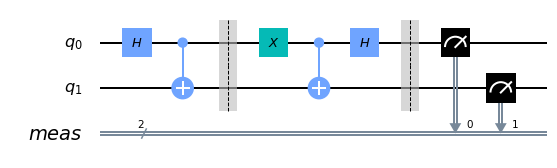

In [3]:
#This algorithm transfers 2 classical bits of information using a single qubit, however we still need 2 qubits for this to work as we have to create entanglement - similar to teleportation algorithm
qc = QuantumCircuit(2)

#Preprocessing qubit by creating entanglement
qc.h(0)
qc.cx(0, 1)
qc.barrier()

#Send 1 qubit to messenger and apply gates on qubit based on message
message = input("What is the emssage to send?  ")
if message == '00':
    pass
elif message == '01':
    qc.z(0)
elif message == '10':
    qc.x(0)
elif message == '11':
    qc.z(0)
    qc.x(0)
else:
    print('No valid message - identity gate used - message sent is 00')


#Reciever recieves the 2 qubits, one directly from preprocessing, one from messenger.
#Decode message by apply inverse operations of preprocessing and measuring for message
qc.cx(0, 1)
qc.h(0)

qc.measure_all()
qc.draw('mpl')

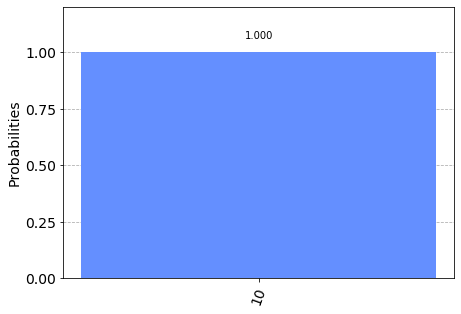

In [4]:
#Running Circuit on simulator. Expect to get result entered above

job_sim = execute(qc, sim, shots=1024)
sim_result = job_sim.result()
plot_histogram(sim_result.get_counts())

Job Status: job has successfully run


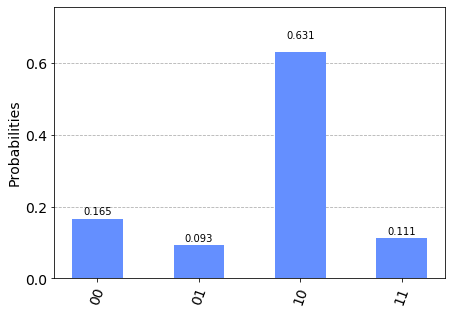

In [5]:
job_qcomp = execute(qc, qcomp, shots=1024)
job_monitor(job_qcomp)
qcomp_result = job_qcomp.result()
plot_histogram(qcomp_result.get_counts())

In [6]:
#Errors due qubit decoherence (noise quantum computers)